<a href="https://colab.research.google.com/github/Rahul786Patidar/Pharmaceutical-Sales-prediction-/blob/main/LSTM_Pharma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense

In [3]:
num_sample =1000

In [4]:
new_data = pd.read_csv('/content/drive/MyDrive/DIGICHROME/cleandata1.csv')
new_data

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,5,2015-07-31,5263,555,1,1,0,1,2,...,1270,7,2008,0,0,0,1,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,0,...,570,7,2007,1,13,2010,0,0,1,0
2,3,5,2015-07-31,8314,821,1,1,0,1,0,...,14130,7,2006,1,14,2011,0,0,1,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,2,...,620,7,2009,0,0,0,1,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,0,...,29910,7,2015,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,1,1,0,...,1900,1,2014,1,31,2013,0,0,1,0
1017205,1112,2,2013-01-01,0,0,0,0,1,1,2,...,1880,1,2006,0,0,0,1,0,0,0
1017206,1113,2,2013-01-01,0,0,0,0,1,1,0,...,9260,1,0,0,0,0,1,0,0,0
1017207,1114,2,2013-01-01,0,0,0,0,1,1,0,...,870,1,0,0,0,0,1,0,0,0


In [7]:
num_samples = 1000
time_steps = np.linspace(0,20*np.pi,num_samples)
new_data = np.sin(time_steps)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
new_data = new_data.reshape(-1,1)
new_data_scaled = scaler.fit_transform(new_data)

In [9]:
sequence_length = 50

X = []
y = []
for i in range(len(new_data_scaled) - sequence_length):
    X.append(new_data_scaled[i : i + sequence_length])
    y.append(new_data_scaled[i + sequence_length])

X = np.array(X)
y = np.array(y)

In [10]:
## Split data into train test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [11]:
## Build and train my LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(sequence_length, 1)))
model.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' activation for output between 0 and 1

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
24/24 [==============================] - 3s 22ms/step - loss: 0.0923
Epoch 2/50
24/24 [==============================] - 1s 22ms/step - loss: 0.0134
Epoch 3/50
24/24 [==============================] - 1s 22ms/step - loss: 0.0024
Epoch 4/50
24/24 [==============================] - 1s 23ms/step - loss: 8.4185e-04
Epoch 5/50
24/24 [==============================] - 1s 22ms/step - loss: 5.2740e-04
Epoch 6/50
24/24 [==============================] - 1s 22ms/step - loss: 4.3698e-04
Epoch 7/50
24/24 [==============================] - 1s 23ms/step - loss: 3.8044e-04
Epoch 8/50
24/24 [==============================] - 1s 22ms/step - loss: 3.3167e-04
Epoch 9/50
24/24 [==============================] - 1s 22ms/step - loss: 2.9642e-04
Epoch 10/50
24/24 [==============================] - 1s 21ms/step - loss: 2.7047e-04
Epoch 11/50
24/24 [==============================] - 1s 33ms/step - loss: 2.4131e-04
Epoch 12/50
24/24 [==============================] - 1s 38ms/step - loss: 2.2220e-04
E

In [12]:
#make prediction of model
y_pred = model.predict(X_test)

6/6 [==============================] - 1s 12ms/step


In [13]:
## Perfrming my transformation
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

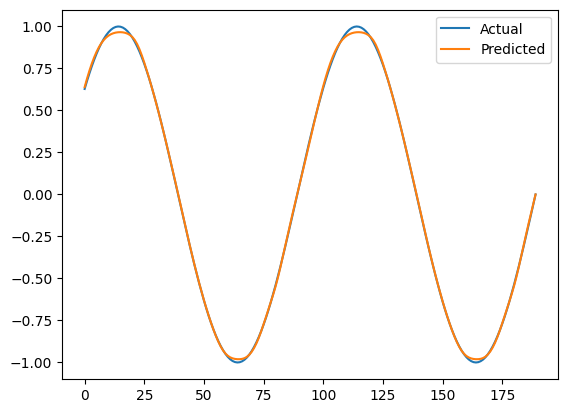

In [14]:
## Visualize the results
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()